In [9]:
import pandas as pd

df1 = pd.read_excel('xlsx_/f_029df (1).xlsx')
df2 = pd.read_excel('xlsx_/fulltimeDF.xlsx')
df3 = pd.read_excel('xlsx_/f_18224df (1).xlsx')


In [10]:
df2.head()

,dong,highway,ffnc,nfnc,nfc,fsnc,fsc,nsnc,nsc,affnc,anfnc,anfc,afsnc,afsc,ansnc,ansc,population
0,가락1동,0.0,0.225806,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.077419,0.00,0.000000,0.047561,0.022764,0.012,0.034783,0.155581
1,가락2동,0.0,0.161290,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.038710,0.01,0.033333,0.056098,0.043902,0.064,0.130435,0.154967
2,가락본동,0.0,0.032258,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.045161,0.01,0.033333,0.040244,0.040650,0.064,0.078261,0.264574
3,가리봉동,0.0,0.032258,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.283871,0.08,0.233333,0.293902,0.034146,0.392,0.234783,0.062857
4,가산동,0.0,1.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.335484,0.12,0.233333,0.343902,0.058537,0.408,0.286957,0.636785


In [11]:
# null값을 0으로 채워둡니다.
df2 = df2.fillna(0)

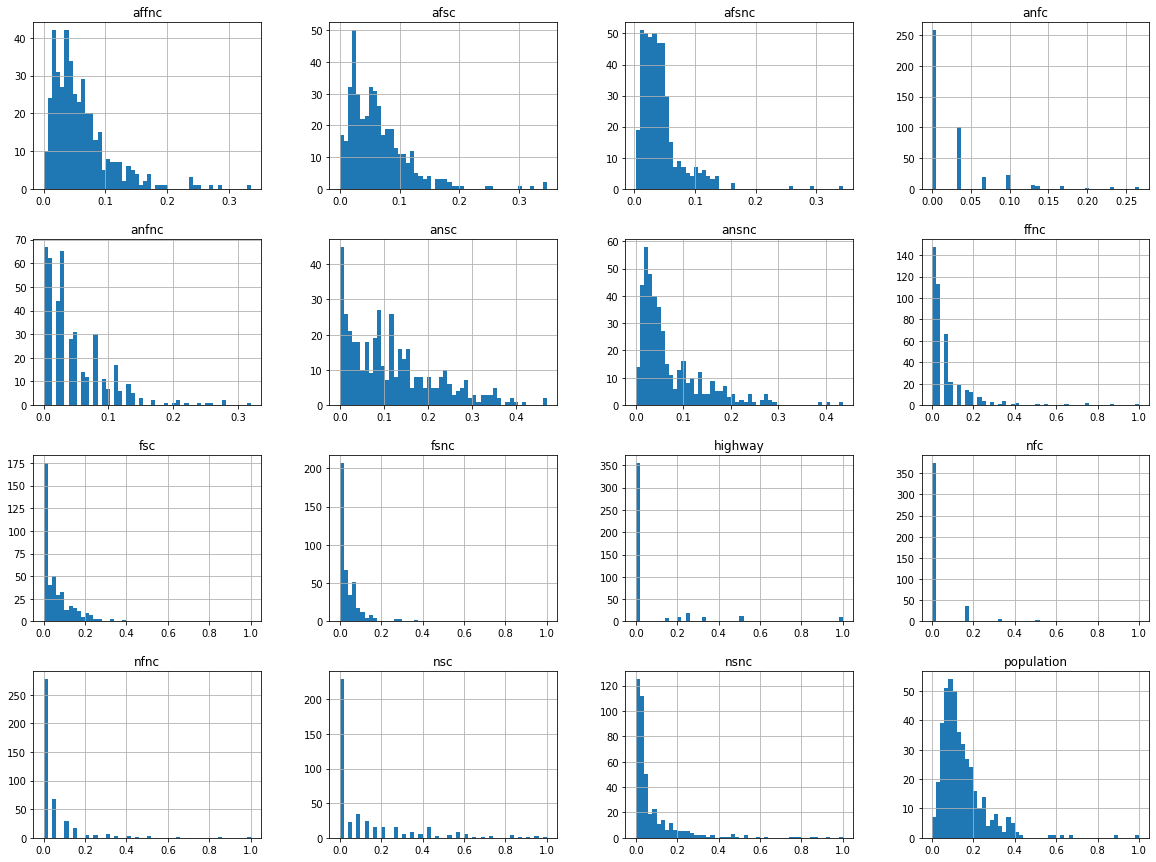

In [12]:
# 데이터들의 histgram을 봅시다.
import matplotlib.pyplot as plt
df2.hist(bins = 50, figsize = (20,15))
plt.show()

,dong,highway,ffnc,nfnc,nfc,fsnc,fsc,nsnc,nsc,affnc,anfnc,anfc,afsnc,afsc,ansnc,ansc,population,pop_cat
0,가락1동,0.0,0.225806,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.077419,0.00,0.000000,0.047561,0.022764,0.012,0.034783,0.155581,2.0
1,가락2동,0.0,0.161290,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.038710,0.01,0.033333,0.056098,0.043902,0.064,0.130435,0.154967,2.0
2,가락본동,0.0,0.032258,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.045161,0.01,0.033333,0.040244,0.040650,0.064,0.078261,0.264574,3.0
3,가리봉동,0.0,0.032258,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.283871,0.08,0.233333,0.293902,0.034146,0.392,0.234783,0.062857,1.0
4,가산동,0.0,1.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.335484,0.12,0.233333,0.343902,0.058537,0.408,0.286957,0.636785,5.0


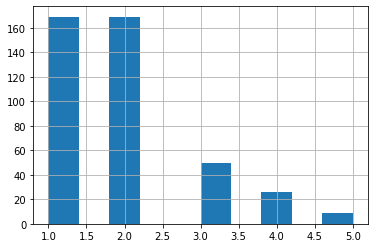

In [13]:
# population 데이터가 class값으로 들어가게 될것입니다.
# 우리는 population data를 치우치지 않게 여러 set 뽑아주는 StratifiedKFold를 하고 싶습니다.
# population을 5개의 구역으로 나눠줬습니다. kfold를 할때 각 구역에서 일정한 값들이 뽑히게 할것입니다.

# pd.cut을 이용하여 population을 5개의 구역으로 나눈것을 pop_cut이라는 column에 담았습니다,
df2["pop_cat"] = pd.cut(df2["population"],
                              bins = [0.0, 0.1, 0.2, 0.3, 0.4, 1.0],
                              labels = [1.0, 2.0, 3.0, 4.0, 5.0])
df2["pop_cat"].hist()
df2.head()

In [14]:
import numpy as np
# average, standard deviation
a = [1,3,5,7,9]
b = sum(a)/5
c = b*np.ones(5)
d = np.sqrt(sum((a - c)**2)/5)
print(b)
print(d)

5.0
2.8284271247461903


In [22]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

# seed를 정해줍니다.
seed = 70
np.random.seed(seed)
tf.random.set_seed(seed)


data = df2.values
x = data[:,1:-2].astype(float)  # feature
y = data[:,-2].astype(float)   # population
y_cat = data[:,-1].astype(float) # pop_cut

#  StratifiedKFold
n_fold = 5
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = seed)
  
# 에러를 담기위해 먼저 빈 array를 만들었습니다.  
test_error_set = []  
train_error_set = [] 

# valiation loss가 patience만큼 반복해도 변하지 않거나 나빠지면 학습을 중단하게 설정합니다.  
# patience 조정가능!
ESC = EarlyStopping(monitor = 'val_loss', patience = 20) 

for train, test in skf.split(x,y_cat): # StratifiedKFold로 나눈 데이터 셋을 받습니다. n_fold가 5이므로 for문은 5번 돌것입니다.
  model = Sequential()
  model.add(Dense(15,input_dim = 15, activation= 'relu'))
  model.add(Dense(8,activation = 'relu'))
  model.add(Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam') 
  model.fit(x[train],y[train], validation_split= 0.2, epochs = 300, batch_size= 10, callbacks = [ESC])
  # fold별로 error를 받아줘서 위에 만든 빈 array에 담아줍니다.
  train_error = mean_squared_error(y[train], model.predict(x[train])) 
  test_error = mean_squared_error(y[test], model.predict(x[test]))
  train_error_set.append(train_error)
  test_error_set.append(test_error)
# error들의 평균과 표준편차를 구해줍니다.
average_train_error = sum(train_error_set)/5
ate1 = average_train_error*np.ones(5)
train_standard_deviation = np.sqrt(sum((train_error_set - ate1)**2)/5)
average_test_error = sum(test_error_set)/5
ate2 = average_test_error*np.ones(5)
test_standard_deviation = np.sqrt(sum((test_error_set - ate2)**2)/5)

print('train:',average_train_error,train_standard_deviation)
print('test:',average_test_error,test_standard_deviation)



ValueError: fill value must be in categories

In [16]:
# 위에서 만든 모델을 바탕으로 layer 수와 node 갯수를 변수로 받는 함수를 만들어줍니다.
def construct_layer(layer_num,node_num):
  test_error_set = []  
  train_error_set = []  
  
  for train, test in skf.split(x,y_cat):
    model = Sequential()
    model.add(Dense(node_num,input_dim = 7, activation= 'relu'))
    model.add(Dense(layer_num,activation = 'relu'))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam') 
    model.fit(x[train],y[train], validation_split= 0.2, epochs = 300, batch_size= 10, callbacks = [ESC])
    train_error = mean_squared_error(y[train], model.predict(x[train]))
    test_error = mean_squared_error(y[test], model.predict(x[test]))
    train_error_set.append(train_error)
    test_error_set.append(test_error)
  
  average_train_error = sum(train_error_set)/5
  ate1 = average_train_error*np.ones(5)
  train_standard_deviation = np.sqrt(sum((train_error_set - ate1)**2)/5)
  average_test_error = sum(test_error_set)/5
  ate2 = average_test_error*np.ones(5)
  test_standard_deviation = np.sqrt(sum((test_error_set - ate2)**2)/5)

  return [average_train_error, train_standard_deviation,average_test_error,test_standard_deviation]  

In [17]:
a = construct_layer(1,15)
print(a)
#결과가 list로 잘 출력이 되네요!

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [18]:
x_arr = [] # train error
y_arr = [] # test error
# hidden layer의 node수를 7로 해두고 층을 계속 쌓았을때 loss가 어떻게 변하는지 그려봅시다.
max_layer = 20
for i in range(0,max_layer):
  a = construct_layer(i,7)
  x_arr.append(a[0])
  y_arr.append(a[2])
  print('layer:',i)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

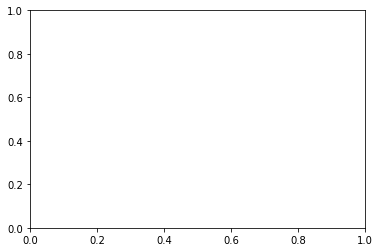

In [19]:
# plot
n = np.arange(0,max_layer)
plt.plot(n,y_arr,c = 'red', label ='test error') 

plt.plot(n,x_arr,c = 'blue', label = 'train error')
plt.xlabel('numer of layers')
plt.ylabel('loss')
plt.title('train error vs test error in 18~9 data')
plt.savefig('train error vs test error')
plt.legend()

In [20]:
#
for train, test in skf.split(x,y_cat): 
  model = Sequential()
  model.add(Dense(15,input_dim = 15, activation= 'relu'))
  model.add(Dense(7,activation = 'relu'))
  model.add(Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam') 
  model.fit(x[train],y[train], validation_split= 0.2, epochs = 100, batch_size= 10, callbacks = [ESC])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [21]:
# plot

# about last fold
# y_predict = model.predict(x[test])

# about all data
y_predict = model.predict(x) 

import matplotlib.pyplot as plt
# about last fold
# plt.scatter(y[test], y_predict, alpha=0.4)

# about all data
plt.scatter(y, y_predict, alpha=0.4)

plt.plot([0,1],[0,1], c = 'red')
plt.xlabel("Actual population")
plt.ylabel("Predicted population")
plt.title("Deep Neural Network - fulltime")
plt.show() 
plt.savefig('DNN_test_full.jpg')


NameError: name 'model' is not defined

In [ ]:
list_y = y.tolist()
list_predicty = []
for i in range(len(list_y)):
    list_predicty.append(y_predict[i].item())

In [ ]:
diff = []
for i in range(len(list_y)):
    diff.append(list_y[i] - list_predicty[i])
diff

[-0.03778039852327278,
 0.024382005622389596,
 0.09246762640347866,
 -0.016242595870093232,
 -0.12828581032338138,
 0.022791767356600323,
 -0.016740346063839395,
 -0.05658075138963172,
 -0.07590256787112988,
 0.048405334332071975,
 0.002832384992631637,
 0.06748602787929756,
 0.05650502616161601,
 0.055235177892496545,
 -0.02394831702486311,
 -0.0718359050770677,
 0.022226389307438393,
 -0.035400320159081386,
 -0.061117248767066194,
 -0.07798292547117866,
 -0.00797169523952912,
 -0.004419922608187368,
 -0.07135899576736252,
 -0.07608184689927458,
 0.029076516878232622,
 0.028913422927940746,
 -0.08544752268789707,
 -0.010868061470792584,
 0.04826664375560666,
 0.053530760407398015,
 -0.10037811224241924,
 -0.014188959538449536,
 0.09662134140386974,
 -0.03720761511449022,
 -0.027785385309921196,
 0.03175446339269747,
 0.00815294385539203,
 0.024231731266033257,
 0.013785251327608536,
 -0.04144643792163086,
 0.019899044197042318,
 -0.046681209841870255,
 -0.06704118984185456,
 -0.050366

In [ ]:
test_df = df2

In [ ]:
test_df['diff'] = diff

In [ ]:
test_df.head()

,dong,highway,ffnc,nfnc,nfc,fsnc,fsc,nsnc,nsc,affnc,anfnc,anfc,afsnc,afsc,ansnc,ansc,population,pop_cat,diff
0,가락1동,0.0,0.225806,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.077419,0.00,0.000000,0.047561,0.022764,0.012,0.034783,0.155581,2.0,-0.037780
1,가락2동,0.0,0.161290,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.038710,0.01,0.033333,0.056098,0.043902,0.064,0.130435,0.154967,2.0,0.024382
2,가락본동,0.0,0.032258,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.045161,0.01,0.033333,0.040244,0.040650,0.064,0.078261,0.264574,3.0,0.092468
3,가리봉동,0.0,0.032258,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.283871,0.08,0.233333,0.293902,0.034146,0.392,0.234783,0.062857,1.0,-0.016243
4,가산동,0.0,1.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.335484,0.12,0.233333,0.343902,0.058537,0.408,0.286957,0.636785,5.0,-0.128286


In [ ]:
test_df.to_excel('xlsx_/fulltimedfPlusDiff(real).xlsx', index=False)

In [ ]:
test_df.sort_values(by=['diff'], axis=0, ascending=False)
test_df.to_excel('xlsx_/fulldfPlusDiff(real)(ver.order).xlsx', index=False)